# WeatherPy
----

### Completed by: Lauren Stein
## Summary Analysis

* Strong correlation between the latitude and max temperatures

    * Northern Hemisphere: Weak negative correlation
    * Southern Hemisphere: Strong postivie correlation
    
    
* As a whole, there is no correlation between world cities latitude and cloudiness, wind-speed, humidity
    * Splicing the city data by hemisphere did NOT reveal any correlation
    
## Important Considerations

* This dataset contains a minimum of 500 randomly selected cities
* Cities with a humidity level greater than 100 were excluded from analysis
* There appear to be **significantly more** datapoints for cities in the **northern** hemisphere compared to the **southern** hemisphere. This may bias or skew the data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

#Create a current date timestamp for graphs
import datetime as dt

#Color dependencies
from matplotlib import cm
from colorspacious import cspace_converter
import collections
from collections import OrderedDict
cmaps = OrderedDict()
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Get the API for weather set up first
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

url = "http://api.openweathermap.org/data/2.5/weather?q=" 
api_key = "&appid=" + weather_api_key


city_name = []
country = []
city_id = []
city_lat = []
city_lng = []
city_temp = []
city_max = []
city_hum = []
city_cloud = []
city_wind = []

#Loop through cities and make an API request
for city in cities:
    query_url = url + city + "&units=imperial" + api_key 
    response = requests.get(query_url).json()
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        city_id.append(response["id"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_temp.append(response["main"]["temp"])
        city_max.append(response["main"]["temp_max"])
        city_hum.append(response["main"]["humidity"])
        city_cloud.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        c_id = response["id"]
        print(f"{city} [id:{c_id}] status check: pass")
    except KeyError:
        print(f"{city} not found in OpenWeatherAPI")

        

jamestown [id:5122534] status check: pass
parang [id:1694775] status check: pass
dingle [id:1714733] status check: pass
ovsyanka [id:1495797] status check: pass
polillo [id:1693125] status check: pass
barentsburg not found in OpenWeatherAPI
nanortalik [id:3421765] status check: pass
kirakira [id:2178753] status check: pass
huarmey [id:3939168] status check: pass
tuatapere [id:2180815] status check: pass
yellowknife [id:6185377] status check: pass
khatanga [id:2022572] status check: pass
yulara [id:6355222] status check: pass
saldanha [id:3361934] status check: pass
puerto ayora [id:3652764] status check: pass
hilo [id:5855927] status check: pass
tasiilaq [id:3424607] status check: pass
albany [id:5106841] status check: pass
mataura [id:6201424] status check: pass
butaritari [id:2110227] status check: pass
arraial do cabo [id:3471451] status check: pass
warqla not found in OpenWeatherAPI
tukrah [id:88834] status check: pass
aklavik [id:5882953] status check: pass
mananjary [id:1061335] 

barahona [id:3492985] status check: pass
pringsewu [id:1630639] status check: pass
vila franca do campo [id:3372472] status check: pass
akyab [id:1295765] status check: pass
polyarnyy [id:506763] status check: pass
punta cardon [id:3629614] status check: pass
terrak [id:3134658] status check: pass
sergeyevka [id:1519385] status check: pass
katsuura [id:2112309] status check: pass
pacific grove [id:5380437] status check: pass
chicama [id:3698359] status check: pass
riberalta [id:3906466] status check: pass
salalah [id:286621] status check: pass
villa carlos paz [id:3832791] status check: pass
louisbourg not found in OpenWeatherAPI
yerbogachen [id:2012956] status check: pass
maneadero [id:3996737] status check: pass
port hardy [id:6111862] status check: pass
de aar [id:1011632] status check: pass
jiayuguan [id:1280957] status check: pass
dom pedro [id:3400969] status check: pass
grande prairie [id:5964347] status check: pass
longyearbyen [id:2729907] status check: pass
garachine [id:3709

kalmunai [id:1242110] status check: pass
korhogo [id:2286304] status check: pass
gat [id:293842] status check: pass
derzhavinsk [id:1524606] status check: pass
gap [id:3016701] status check: pass
bulandshahr [id:1275120] status check: pass
adrar [id:2381972] status check: pass
vagur [id:2610806] status check: pass
kaitangata [id:2208248] status check: pass
rio cuarto [id:3838874] status check: pass
flin flon [id:5954718] status check: pass
wajir [id:178443] status check: pass
hokitika [id:2206894] status check: pass
lulea [id:604490] status check: pass
monticello [id:5038045] status check: pass
ambodifototra not found in OpenWeatherAPI
colwyn bay [id:2652513] status check: pass
maykain not found in OpenWeatherAPI
kuching [id:1735634] status check: pass
kloulklubed [id:7671223] status check: pass
samusu not found in OpenWeatherAPI
takob not found in OpenWeatherAPI
katherine [id:2068655] status check: pass
honningsvag [id:779554] status check: pass
chingirlau [id:610091] status check: pa

leningradskiy [id:2123814] status check: pass
mandalgovi [id:2030065] status check: pass
linqing [id:1803367] status check: pass
delijan [id:136399] status check: pass
tabiauea not found in OpenWeatherAPI


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_dict = {
    "city": city_name,
    "country": country,
    "id": city_id,
    "lat": city_lat,
    "long": city_lng,
    "temp": city_temp,
    "max_temp": city_max,
    "humidity": city_hum,
    "cloud_coverage": city_cloud,
    "wind_speed": city_wind
}

# #Display dataframe
city_df = pd.DataFrame(city_dict)
city_df.head()

,city,country,id,lat,long,temp,max_temp,humidity,cloud_coverage,wind_speed
0,Jamestown,US,5122534,42.10,-79.24,73.08,73.99,94,75,10.29
1,Parang,PH,1694775,7.37,124.27,86.41,86.41,63,95,2.15
2,Dingle,PH,1714733,11.00,122.67,82.13,82.13,81,100,3.31
3,Ovsyanka,RU,1495797,55.96,92.55,66.20,66.20,68,33,4.47
4,Polillo,PH,1693125,14.71,121.94,85.05,85.05,77,100,5.10


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
drop_index = city_df.index[city_df.humidity > 100].tolist()

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(drop_index, inplace=False)


In [7]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.to_csv('datafiles/City_Data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

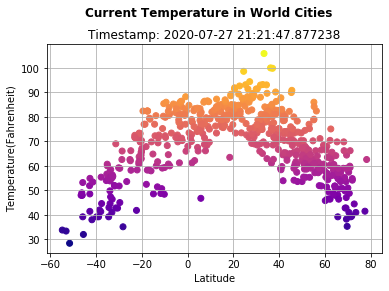

In [8]:
#Scatterplot to compare city latitude by temperature
t=clean_city_data["temp"]
plt.scatter(clean_city_data["lat"], clean_city_data["temp"], marker = "o", c=t, cmap='plasma')

#Graph Properties
plt.suptitle("Current Temperature in World Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Temperature(Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("figures/temp_lat.png")

#Show plot
plt.show()

## Latitude vs. Humidity Plot

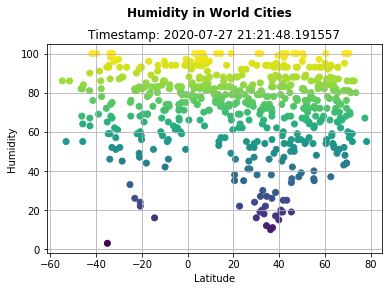

In [9]:
#Scatterplot to compare city latitude by temperature
t=clean_city_data["humidity"]
plt.scatter(clean_city_data["lat"], clean_city_data["humidity"], marker = "o", c=t, cmap='viridis')

#Graph Properties
plt.suptitle("Humidity in World Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("figures/hum_lat.png")

#Show plot
plt.show()

## Latitude vs. Cloudiness Plot

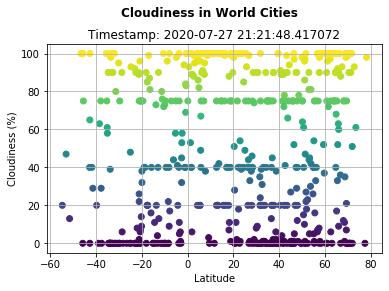

In [10]:
#Scatterplot to compare city latitude by temperature
t=clean_city_data["cloud_coverage"]
plt.scatter(clean_city_data["lat"], clean_city_data["cloud_coverage"], marker = "o", c=t, cmap='viridis')

#Graph Properties
plt.suptitle("Cloudiness in World Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("figures/cloud_lat.png")

#Show plot
plt.show()

## Latitude vs. Wind Speed Plot

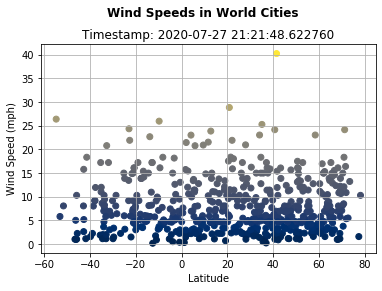

In [11]:
#Scatterplot to compare city latitude by temperature
t=clean_city_data["wind_speed"]
plt.scatter(clean_city_data["lat"], clean_city_data["wind_speed"], marker = "o", c=t, cmap='cividis')

#Graph Properties
plt.suptitle("Wind Speeds in World Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("figures/wind_lat.png")

#Show plot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data[clean_city_data["lat"] > 0]
equator_df = clean_city_data[clean_city_data["lat"] == 0]
southern_df = clean_city_data[clean_city_data["lat"] < 0]

# Export the Data into a csv
northern_df.to_csv("datafiles/northern_hemisphere_cities.csv", index=False)
southern_df.to_csv("datafiles/southern_hemisphere_cities.csv", index=False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45190686173886047


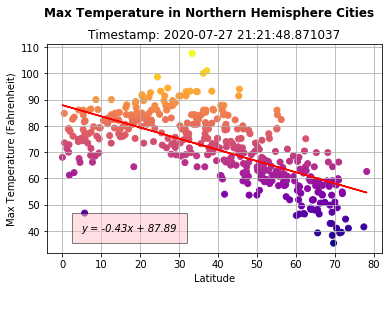

In [14]:
#Add linear Regression equation and plot
x_values = northern_df["lat"]
y_values = northern_df["max_temp"]

#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatterplot to compare city latitude by temperature
t=northern_df["max_temp"]
plt.scatter(northern_df["lat"], northern_df["max_temp"], marker = "o", c=t, cmap='plasma')

#Graph Properties
plt.suptitle("Max Temperature in Northern Hemisphere Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)


plt.text(5,40, line_eq, 
         style='italic',
         bbox={'facecolor': 'pink', 'alpha': 0.5, 'pad': 10})

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,8),fontsize=15)


print(f"The r-squared is: {rvalue**2}")


#Save figure
plt.savefig("figures/north_maxtemp_lat_regress.png")

#Show plot
plt.show()


>There is a __weak negative__ correlaiton between city latitude and max temperature for cities located in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6068626027344052


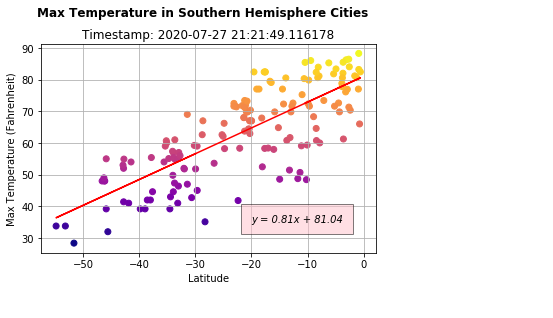

In [15]:
#Add linear Regression equation and plot
x_values = southern_df["lat"]
y_values = southern_df["max_temp"]

#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatterplot to compare city latitude by temperature
t=southern_df["max_temp"]
plt.scatter(southern_df["lat"], southern_df["max_temp"], marker = "o", c=t, cmap='plasma')

#Graph Properties
plt.suptitle("Max Temperature in Southern Hemisphere Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)


plt.text(-20,35, line_eq, 
         style='italic',
         bbox={'facecolor': 'pink', 'alpha': 0.5, 'pad': 10})

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,8),fontsize=15, color="red")


print(f"The r-squared is: {rvalue**2}")


#Save figure
plt.savefig("figures/south_maxtemp_lat_regress.png")

#Show plot
plt.show()


> There is a __strong positive__ correlation between the city latitude and max tempearture for cities in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014221821760790723


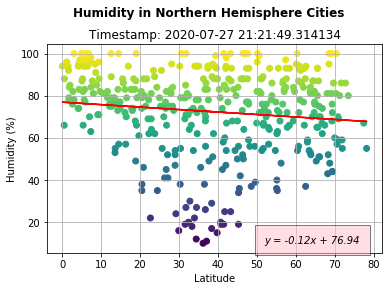

In [16]:
#Add linear Regression equation and plot
x_values = northern_df["lat"]
y_values = northern_df["humidity"]

#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatterplot to compare city latitude by temperature
t=northern_df["humidity"]
plt.scatter(northern_df["lat"], northern_df["humidity"], marker = "o", c=t, cmap='viridis')

#Graph Properties
plt.suptitle("Humidity in Northern Hemisphere Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.text(52,10, line_eq, 
         style='italic',
         bbox={'facecolor': 'pink', 'alpha': 0.5, 'pad': 10})

plt.plot(x_values, regress_values, "r-")



print(f"The r-squared is: {rvalue**2}")


#Save figure
plt.savefig("figures/north_humidity_lat_regress.png")

#Show plot
plt.show()

> There is **no** correlation between __*northern*__ city latitude and humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017804374879882416


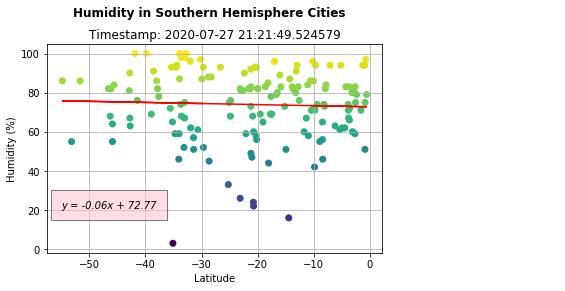

In [17]:
#Add linear Regression equation and plot
x_values = southern_df["lat"]
y_values = southern_df["humidity"]

#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatterplot to compare city latitude by temperature
t=southern_df["humidity"]
plt.scatter(southern_df["lat"], southern_df["humidity"], marker = "o", c=t, cmap='viridis')

#Graph Properties
plt.suptitle("Humidity in Southern Hemisphere Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.text(-55,21, line_eq, 
         style='italic',
         bbox={'facecolor': 'pink', 'alpha': 0.5, 'pad': 10})

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,8),fontsize=15, color="red")


print(f"The r-squared is: {rvalue**2}")


#Save figure
plt.savefig("figures/south_humidity_lat_regress.png")

#Show plot
plt.show()

> There is **no** correlation between __*southern*__ city latitude and humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012532559696750977


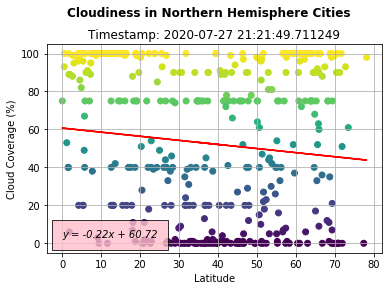

In [18]:
#Add linear Regression equation and plot
x_values = northern_df["lat"]
y_values = northern_df["cloud_coverage"]

#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatterplot to compare city latitude by temperature
t=northern_df["cloud_coverage"]
plt.scatter(northern_df["lat"], northern_df["cloud_coverage"], marker = "o", c=t, cmap='viridis')

#Graph Properties
plt.suptitle("Cloudiness in Northern Hemisphere Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Cloud Coverage (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.text(0,3, line_eq, 
         style='italic',
         bbox={'facecolor': "pink", 'alpha': 0.8, 'pad': 10})

plt.plot(x_values, regress_values, "r-")



print(f"The r-squared is: {rvalue**2}")


#Save figure
plt.savefig("figures/north_cloud_lat_regress.png")

#Show plot
plt.show()

> There is **no** correlation between __*northern*__ city latitude and cloud coverage

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009202261200794395


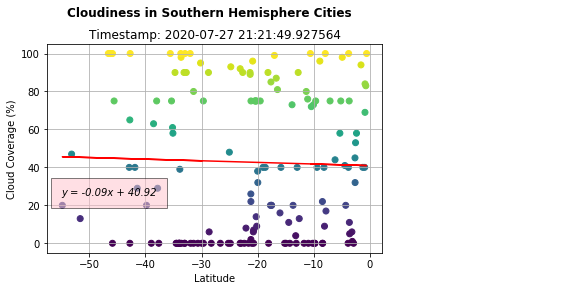

In [19]:
#Add linear Regression equation and plot
x_values = southern_df["lat"]
y_values = southern_df["cloud_coverage"]

#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatterplot to compare city latitude by temperature
t=southern_df["cloud_coverage"]
plt.scatter(southern_df["lat"], southern_df["cloud_coverage"], marker = "o", c=t, cmap='viridis')

#Graph Properties
plt.suptitle("Cloudiness in Southern Hemisphere Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Cloud Coverage (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.text(-55,25, line_eq, 
         style='italic',
         bbox={'facecolor': 'pink', 'alpha': 0.5, 'pad': 10})

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,8),fontsize=15, color="red")


print(f"The r-squared is: {rvalue**2}")


#Save figure
plt.savefig("figures/south_cloud_lat_regress.png")

#Show plot
plt.show()

> There is **no** correlation between __*southern*__ city latitude and cloud coverage

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00016207234744953852


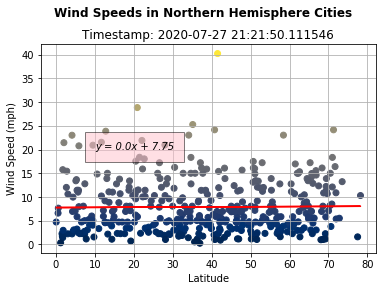

In [20]:
#Add linear Regression equation and plot
x_values = northern_df["lat"]
y_values = northern_df["wind_speed"]

#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatterplot to compare city latitude by temperature
t=northern_df["wind_speed"]
plt.scatter(northern_df["lat"], northern_df["wind_speed"], marker = "o", c=t, cmap='cividis')

#Graph Properties
plt.suptitle("Wind Speeds in Northern Hemisphere Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.text(10,20, line_eq, 
         style='italic',
         bbox={'facecolor': "pink", 'alpha': 0.5, 'pad': 10})

plt.plot(x_values, regress_values, "r-")



print(f"The r-squared is: {rvalue**2}")


#Save figure
plt.savefig("figures/north_wind_lat_regress.png")

#Show plot
plt.show()

> There is **no** correlation between __*northern*__ city latitude and wind speeds

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.084798239601222e-05


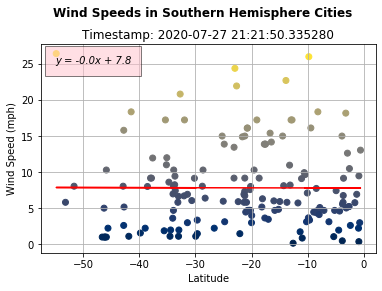

In [21]:
#Add linear Regression equation and plot
x_values = southern_df["lat"]
y_values = southern_df["wind_speed"]

#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatterplot to compare city latitude by temperature
t=southern_df["wind_speed"]
plt.scatter(southern_df["lat"], southern_df["wind_speed"], marker = "o", c=t, cmap='cividis')

#Graph Properties
plt.suptitle("Wind Speeds in Southern Hemisphere Cities", fontsize=12, fontweight = "bold")
plt.title(f"Timestamp: {dt.datetime.now()}")
plt.subplots_adjust(top = 0.85)

plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.text(-55,25, line_eq, 
         style='italic',
         bbox={'facecolor': 'pink', 'alpha': 0.5, 'pad': 10})

plt.plot(x_values, regress_values, "r-")


print(f"The r-squared is: {rvalue**2}")


#Save figure
plt.savefig("figures/south_wind_lat_regress.png")

#Show plot
plt.show()

> There is **no** correlation between __*southern*__ city latitude and wind speeds